<a href="https://colab.research.google.com/github/tomoyafujimori/face/blob/main/face2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ====================================================================
# コードブロック 1: 環境準備、プロジェクトのクローン、依存関係のインストール、モデルのダウンロード（最初の1回のみ実行）
# ====================================================================

# 1. stylegan2encoder をクローン（画像アライメントに使用）
!git clone https://github.com/rolux/stylegan2encoder.git
%cd stylegan2encoder

# 2. アライメント用の依存関係をインストール
!pip install -q scipy dlib

# 3. 顔のランドマーク検出モデルをダウンロード
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

# 4. PIL の互換性問題を修正（stylegan2encoder 向け）
!sed -i 's/PIL.Image.ANTIALIAS/PIL.Image.LANCZOS/g' ffhq_dataset/face_alignment.py

# 5. 上位ディレクトリに戻る
%cd ..

# 6. 競合する datasets ライブラリをアンインストール
!pip uninstall -y datasets

# 7. pSp encoder をクローン
!git clone https://github.com/eladrich/pixel2style2pixel.git

# 8. pSp ディレクトリに移動して依存関係をインストール、モデルをダウンロード
%cd pixel2style2pixel

# 9. 必要な依存関係をインストール（最初の実行時のみ必要）
!pip install -q torch==1.9.0 torchvision==0.10.0
!pip install -q lpips
!pip install -q ninja
!pip install -q gdown
!pip install -q matplotlib
!pip install -q scikit-image

# 10. 事前学習済みモデルをダウンロード（最初の実行時のみ必要）
print("\n事前学習済みの pSp モデルをダウンロード中...")
import gdown
model_url = 'https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0'
gdown.download(model_url, 'psp_ffhq_encode.pt', quiet=False)

# 11. 修正済みのファイルをアップロードして置き換える
print("\n修正済みの psp.py と inference.py をアップロードしてください:")
from google.colab import files
uploaded_mods = files.upload()

# アップロードされたファイルで置き換え
for filename, content in uploaded_mods.items():
    if filename == 'psp.py':
        target_path = 'models/psp.py'
        with open(target_path, 'wb') as f:
            f.write(content)
        print(f"✅ アップロードした {filename} を {target_path} に置き換えました")
    elif filename == 'inference.py':
        target_path = 'scripts/inference.py'
        with open(target_path, 'wb') as f:
            f.write(content)
        print(f"✅ アップロードした {filename} を {target_path} に置き換えました")

print("\n✅ 環境準備が完了しました。次のコードブロックを実行して、画像をアップロードし投影を行ってください。")


Cloning into 'stylegan2encoder'...
remote: Enumerating objects: 111, done.
remote: Total 111 (delta 0), reused 0 (delta 0), pack-reused 111 (from 1)
Receiving objects: 100% (111/111), 1.55 MiB | 4.24 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/stylegan2encoder
--2025-10-28 05:34:31--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-10-28 05:34:31--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  31.2MB/s    in 2.0s    

2025-10-

Downloading...
From (original): https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0
From (redirected): https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0&confirm=t&uuid=d920ec29-c1d1-4466-ac01-a79cacecf61a
To: /content/pixel2style2pixel/psp_ffhq_encode.pt
100%|██████████| 1.20G/1.20G [00:15<00:00, 79.6MB/s]


请上传你修改后的 psp.py 和 inference.py 文件:


Saving psp.py to psp.py
Saving inference.py to inference.py
✅ 已用上传的 psp.py 替换 models/psp.py
✅ 已用上传的 inference.py 替换 scripts/inference.py

环境准备完成。现在可以运行第二个代码块上传图片并执行投影。



请上传你的原始人脸图像（可多张）:


Saving 証明写真.jpg to 証明写真.jpg
已移动: 証明写真.jpg
/content/stylegan2encoder

--- 正在执行图像对齐 ---
2025-10-28 05:36:33.488294: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761629793.507311    2138 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761629793.513078    2138 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761629793.527747    2138 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761629793.527775    2138 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W

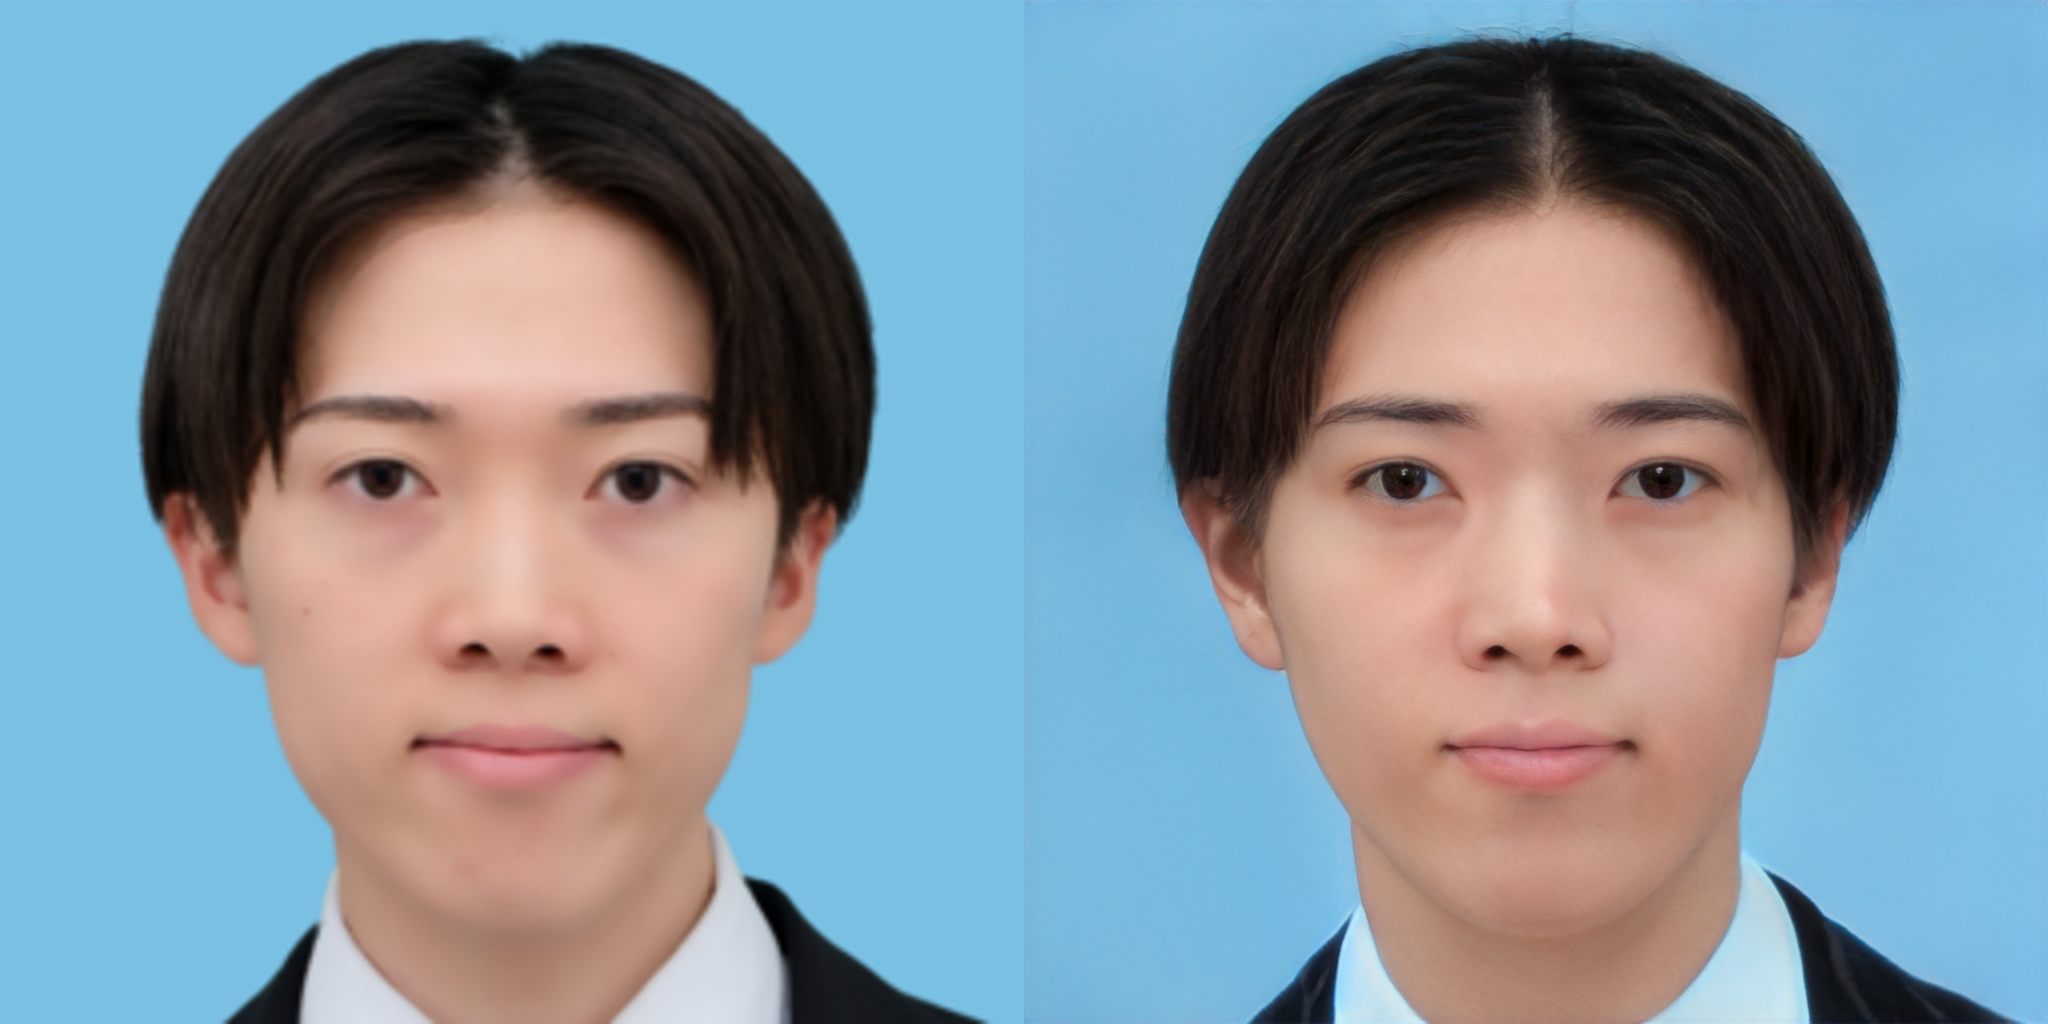


projection_output/inference_results/証明写真_01.png


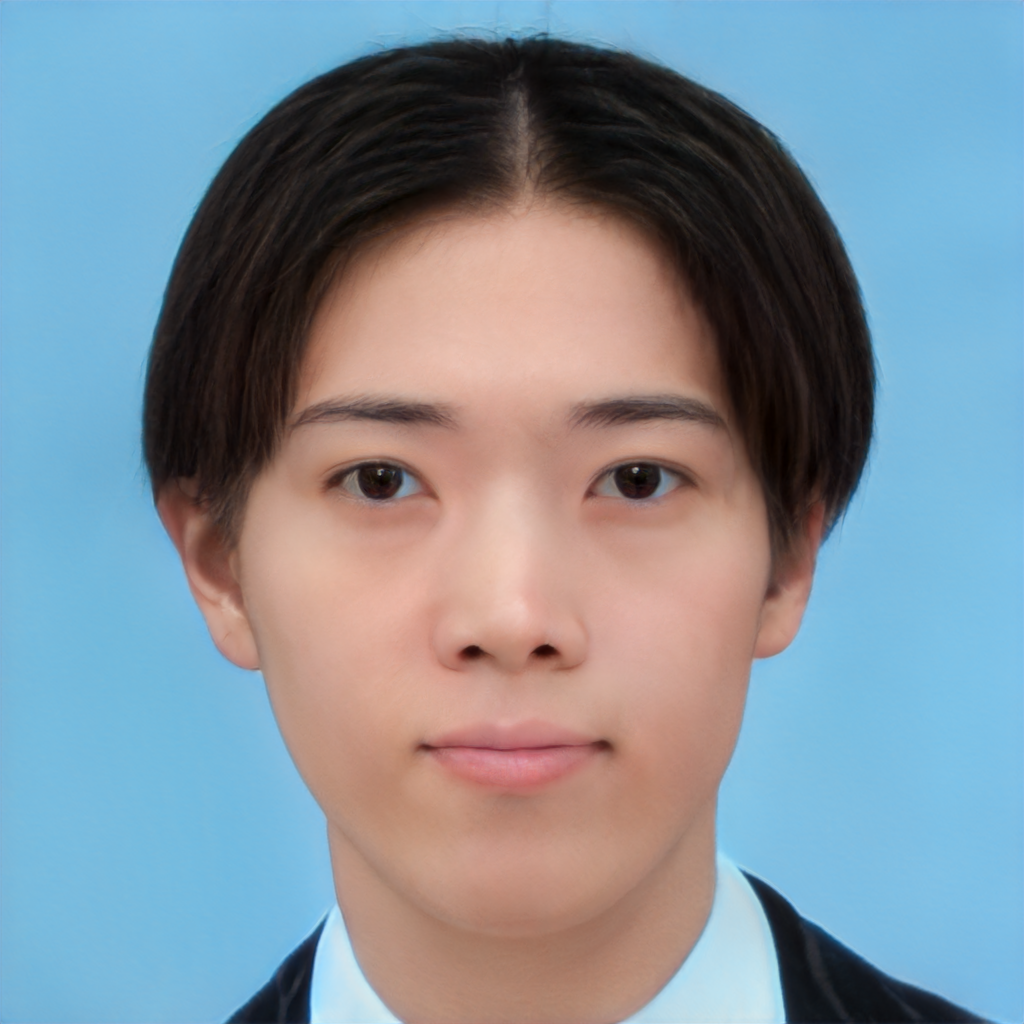


潜在代码文件 (.pt 或其他格式) 已生成，请在下载结果中查看。

开始压缩并下载结果 (包含图像和潜在代码)...
  adding: projection_output/ (stored 0%)
  adding: projection_output/stats.txt (stored 0%)
  adding: projection_output/inference_results/ (stored 0%)
  adding: projection_output/inference_results/証明写真_01_latent.pt (deflated 9%)
  adding: projection_output/inference_results/証明写真_01.png (deflated 0%)
  adding: projection_output/inference_coupled/ (stored 0%)
  adding: projection_output/inference_coupled/証明写真_01.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ 下载完成！


In [2]:
# ====================================================================
# コードブロック 2: 画像のアップロード・アライメント・投影・表示・ダウンロード（何度でも実行可）
# ====================================================================

from google.colab import files
from IPython.display import Image, display
import glob
import shutil
import os
import sys

# 現在の作業ディレクトリが正しいか確認（pixel2style2pixel フォルダ内で実行されているかチェック）
try:
    if os.path.basename(os.getcwd()) != 'pixel2style2pixel':
        %cd pixel2style2pixel
except:
    print("⚠️ pixel2style2pixel ディレクトリに移動できません。まず最初のコードブロックを実行してください。")
    sys.exit()

# --- アライメント処理（stylegan2encoder を使用） ---
ALIGN_DIR = '../stylegan2encoder'
RAW_IMAGES_DIR = f'{ALIGN_DIR}/raw_images'
ALIGNED_IMAGES_DIR = f'{ALIGN_DIR}/aligned_images'

# 1. アライメントに必要なフォルダを作成
!mkdir -p $RAW_IMAGES_DIR $ALIGNED_IMAGES_DIR

# 2. 古い入力／出力データを削除（任意だが推奨）
!rm -rf $RAW_IMAGES_DIR/* $ALIGNED_IMAGES_DIR/* inference_input/* projection_output/*

# 3. 元の顔画像をアップロード
print("\nあなたの元の顔画像をアップロードしてください（複数枚でも可）:")
uploaded = files.upload()

# 4. アップロードした画像を raw_images フォルダに移動
for filename in uploaded.keys():
    shutil.move(filename, f'{RAW_IMAGES_DIR}/{filename}')
    print(f"移動完了: {filename}")

# 5. アライメント実行（stylegan2encoder ディレクトリ内でスクリプトを実行）
%cd $ALIGN_DIR
print("\n--- 顔画像のアライメントを実行中 ---")
!python align_images.py raw_images/ aligned_images/
print("--- アライメント完了 ---")

# 6. pSp ディレクトリに戻る
%cd ../pixel2style2pixel

# 7. アライメント結果を確認して入力準備
aligned_images = glob.glob(f'{ALIGNED_IMAGES_DIR}/*.png')
if aligned_images:
    # アライメント済み画像を inference_input フォルダへコピー
    !mkdir -p inference_input
    for img in aligned_images:
        shutil.copy(img, 'inference_input/')

    print(f"\n{len(aligned_images)} 枚の画像を投影開始します...")

    # 8. pSp 投影を実行
    print("\n\n--- pSp による投影を実行中 ---")
    !python scripts/inference.py \
      --exp_dir=projection_output \
      --checkpoint_path=psp_ffhq_encode.pt \
      --data_path=inference_input \
      --test_batch_size=1 \
      --test_workers=1 \
      --couple_outputs

    # 9. 出力結果を確認・表示
    print("\n出力ファイルを確認中...")
    result_files = glob.glob('projection_output/**/*', recursive=True)

    image_results = [f for f in result_files if f.endswith('.jpg') or f.endswith('.png')]

    if image_results:
        print(f"\n✓ 投影成功！ {len(image_results)} 個の画像結果ファイルが見つかりました")

        for result in sorted(image_results):
            print(f"\n{result}")
            display(Image(result))

        print("\n潜在ベクトルファイル（.pt など）も生成されています。ダウンロード結果に含まれます。")
    else:
        print("\n⚠️ 結果ファイルが見つかりません。デバッグを試みます...")
        !find projection_output -type f

    # 10. 結果を圧縮してダウンロード
    print("\n結果（画像および潜在コードを含む）を圧縮してダウンロードします...")
    !zip -r psp_projection.zip projection_output/
    files.download('psp_projection.zip')
    print("✅ ダウンロード完了！")

else:
    print("アライメント済みの画像が見つかりません。アップロード手順が正しく行われたか確認してください。")


In [ ]:
# ====================================================================
# コードブロック 2.1: 以前のデータを削除（新しい画像をアップロードする前に実行可能）
# ====================================================================

import shutil
import os
import glob

print("🧹 以前のデータをクリーニング中...")

# 削除対象のディレクトリを定義
ALIGN_DIR = '../stylegan2encoder'
RAW_IMAGES_DIR = f'{ALIGN_DIR}/raw_images'
ALIGNED_IMAGES_DIR = f'{ALIGN_DIR}/aligned_images'

dirs_to_clean = [
    RAW_IMAGES_DIR,           # 元の画像
    ALIGNED_IMAGES_DIR,       # アライメント後の画像
    'inference_input',        # pSp の入力フォルダ
    'projection_output',      # pSp の出力フォルダ
]

# 各ディレクトリをクリーンアップ
for dir_path in dirs_to_clean:
    if os.path.exists(dir_path):
        # ディレクトリ内のすべてのファイルを削除
        for item in glob.glob(f'{dir_path}/*'):
            try:
                if os.path.isfile(item):
                    os.remove(item)
                    print(f"  ✓ ファイル削除: {item}")
                elif os.path.isdir(item):
                    shutil.rmtree(item)
                    print(f"  ✓ ディレクトリ削除: {item}")
            except Exception as e:
                print(f"  ✗ 削除失敗 {item}: {e}")
        print(f"✓ クリーン完了: {dir_path}")
    else:
        print(f"⚠️ ディレクトリが存在しません: {dir_path}")

# 以前の圧縮ファイルも削除
if os.path.exists('psp_projection.zip'):
    os.remove('psp_projection.zip')
    print("✓ 古い圧縮ファイルを削除しました: psp_projection.zip")

print("\n✅ データのクリーニングが完了しました。新しい画像をアップロードできます。")


🧹 开始清理之前的数据...
✓ 已清理: ../stylegan2encoder/raw_images
✓ 已清理: ../stylegan2encoder/aligned_images
✓ 已清理: inference_input
✓ 已清理: projection_output

✅ 数据清理完成！可以上传新图像了。


In [ ]:
# ===== ステップ 1: テスト用生成スクリプト (simple_generate.py) の定義と保存 - 修正版 =====

simple_generate_pt = """
import torch
import numpy as np
from argparse import Namespace
from models.psp import pSp
from PIL import Image
import sys
import os
import shlex

# コマンドライン引数の確認
if len(sys.argv) < 2:
    print("使用方法: python simple_generate.py <latent_file.pt>")
    sys.exit(1)

# コマンドライン引数を取得し、安全にファイル名を解析
# Colab/Jupyter は引数を shlex.quote で囲むため、shlex.split で元のファイル名を取り出す
latent_file_input = sys.argv[1]

# 引用符付きの引数を shlex.split で正しく処理
try:
    # shlex.split() はシングル/ダブルクォート付きの文字列も安全に分割できる
    latent_file_list = shlex.split(latent_file_input)
    if not latent_file_list:
        raise ValueError("ファイル名の解析に失敗しました")
    latent_file = latent_file_list[0]
except Exception as e:
    # 解析失敗時のフォールバック: 引用符を除去して入力をそのまま使用
    latent_file = latent_file_input.strip("'\\\"")
    print(f"⚠️ 警告: shlex 解析に失敗、代替ファイル名を使用します: {latent_file}")


# モデルの読み込み
print("モデルを読み込み中...")
model_path = 'psp_ffhq_encode.pt'
if not os.path.exists(model_path):
    print(f"❌ エラー: モデルファイル {model_path} が見つかりません。事前にダウンロードまたはアップロードしてください。")
    sys.exit(1)

# --- モデルのロードと初期化 ---
try:
    ckpt = torch.load(model_path, map_location='cpu')
    opts = ckpt['opts']
except Exception as e:
    print(f"❌ エラー: モデルチェックポイントの読み込みに失敗: {e}")
    sys.exit(1)

# 欠落しているパラメータを補完
if 'output_size' not in opts:
    opts['output_size'] = 1024
if 'n_styles' not in opts:
    opts['n_styles'] = int(np.log2(opts['output_size'])) * 2 - 2

opts['checkpoint_path'] = model_path
opts = Namespace(**opts)

# pSp モデルの初期化
try:
    net = pSp(opts)
    net.eval()
except Exception as e:
    print(f"❌ エラー: pSp モデルの初期化に失敗: {e}")
    sys.exit(1)

if torch.cuda.is_available():
    net.cuda()

# --- 潜在ベクトルの読み込み ---
print(f"潜在ベクトルを読み込み中: {latent_file}")
try:
    # torch.load で .pt ファイルを読み込む
    latent_tensor = torch.load(latent_file, map_location='cpu')
except Exception as e:
    print(f"❌ エラー: {latent_file} の読み込みに失敗: {e}")
    sys.exit(1)

# 形状を確認: [1, N_styles, Latent_Dim] であることを期待
if len(latent_tensor.shape) == 2:
    latent_tensor = latent_tensor.unsqueeze(0)
elif len(latent_tensor.shape) != 3 or latent_tensor.shape[0] != 1:
    print(f"⚠️ 警告: 潜在ベクトルの形状が想定外 {latent_tensor.shape}。処理を続行します...")

if torch.cuda.is_available():
    latent_tensor = latent_tensor.cuda()

# --- 画像生成 ---
print("画像を生成中...")
try:
    with torch.no_grad():
        image, _ = net.decoder([latent_tensor], input_is_latent=True, randomize_noise=False)

    # --- 生成画像の保存 ---
    img_array = (image[0].cpu().permute(1, 2, 0).numpy() + 1) / 2 * 255
    img = Image.fromarray(img_array.astype('uint8'))

    # 出力ファイル名を .pt → _generated.png に変更
    output_file = latent_file.rsplit('.pt', 1)[0] + '_generated.png'

    img.save(output_file)
    print(f"✅ 保存完了: {output_file}")

except Exception as e:
    print(f"❌ エラー: 画像生成または保存に失敗: {e}")
    sys.exit(1)
"""

# 新しいコードをファイルに書き込む
with open('simple_generate.py', 'w') as f:
    f.write(simple_generate_pt)

print("✅ 'simple_generate.py' スクリプトを更新・保存しました。")


✅ 'simple_generate.py' 脚本已更新并保存。


In [ ]:
!ls

cog.yaml	     environment      notebooks		  psp.py
configs		     inference_input  options		  README.md
criteria	     inference.py     predict.py	  scripts
datasets	     LICENSE	      projection_output   simple_generate.py
docs		     licenses	      psp_ffhq_encode.pt  training
download-weights.sh  models	      psp_projection.zip  utils


In [ ]:
import glob
import os

print("🧹 すべての .pt ファイルを検索して削除します...")

# 現在のディレクトリ内で、拡張子が .pt のすべてのファイルを検索
pt_files = glob.glob('*.pt')

if not pt_files:
    print("⚠️ .pt ファイルが見つかりませんでした。")
else:
    print(f"✅ {len(pt_files)} 個の .pt ファイルが見つかりました:")

    for pt_file in pt_files:
        try:
            # モデルファイル（psp_ffhq_encode.pt）は削除対象から除外
            if pt_file == 'psp_ffhq_encode.pt':
                print(f"  - スキップ: モデルファイル {pt_file}")
                continue

            os.remove(pt_file)
            print(f"  - 🗑️ 削除完了: {pt_file}")
        except OSError as e:
            print(f"  - ❌ 削除失敗 {pt_file}: {e}")

print("\n✅ クリーンアップ完了。")


开始查找并删除所有 .pt 文件...
找到 1 个 .pt 文件：
  - 跳过模型文件: psp_ffhq_encode.pt

清理完成。


In [ ]:
# ===== ステップ 2: 潜在ベクトルのアップロード・画像生成・表示 =====

print("\n--- 画像生成の準備 ---")
print("⚙️ 『psp_ffhq_encode.pt』 モデルファイルが現在のディレクトリに存在することを確認してください。")
print("⭐ 次に、あなたの .pt 潜在ベクトルファイルをアップロードしてください:\n")

from google.colab import files
from IPython.display import Image, display
import shlex
import os

# ファイルをアップロード
uploaded = files.upload()

# 画像生成処理開始
print("\n--- アップロードしたファイルを処理中 ---")

for filename in uploaded.keys():
    # .pt ファイルかどうかを確認
    if filename.endswith('.pt') or '.pt' in filename:
        print(f"\n処理中: {filename}")

        # 🔒 重要: ファイル名に空白や括弧が含まれても安全に扱えるよう、shlex.quote() でクォート
        quoted_filename = shlex.quote(filename)

        print(f"実行コマンド: !python simple_generate.py {quoted_filename}")

        # simple_generate.py スクリプトを実行して画像を生成
        !python simple_generate.py {quoted_filename}

        # 出力ファイル名を simple_generate.py のロジックと合わせて推定
        output_name = filename.rsplit('.pt', 1)[0] + '_generated.png'

        print(f"\n生成された画像ファイル: {output_name}")

        # 生成結果が存在すれば表示
        if os.path.exists(output_name):
            print("👇👇👇")
            display(Image(output_name))
            print("👆👆👆")
            # 自動ダウンロードしたい場合は、以下の行のコメントアウトを外す
            # files.download(output_name)
        else:
            print(f"❌ エラー: 生成された画像ファイル {output_name} が見つかりません。上記の出力ログを確認してください。")
    else:
        print(f"⏭️ スキップ: {filename} は .pt ファイルではありません。")



--- 准备生成 ---
请确保 'psp_ffhq_encode.pt' 模型文件存在于当前目录。
⭐ 上传你的 .pt 潜向量文件:



Saving mu2_01_latent.pt to mu2_01_latent.pt

--- 开始处理上传的文件 ---

处理: mu2_01_latent.pt
执行命令: !python simple_generate.py mu2_01_latent.pt
W1024 05:32:53.261000 15341 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1024 05:32:53.261000 15341 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.
W1024 05:32:53.305000 15341 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1024 05:32:53.305000 15341 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.
加载模型...
Loading pSp from checkpoint: psp_ffhq_encode.pt
加载向量: mu2_01_latent.pt
生成图像...
